In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.dates as mdates


df = pd.read_csv("../data/processed/sentiment_results.csv")

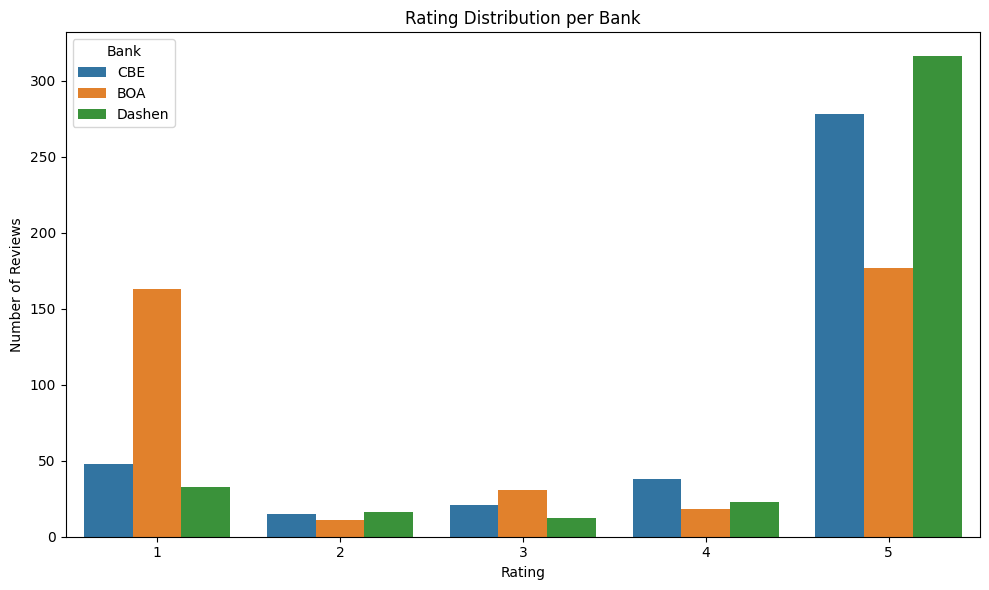

In [9]:
# Plot 1: Rating Distribution per Bank

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='rating', hue='bank')
plt.title('Rating Distribution per Bank')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()

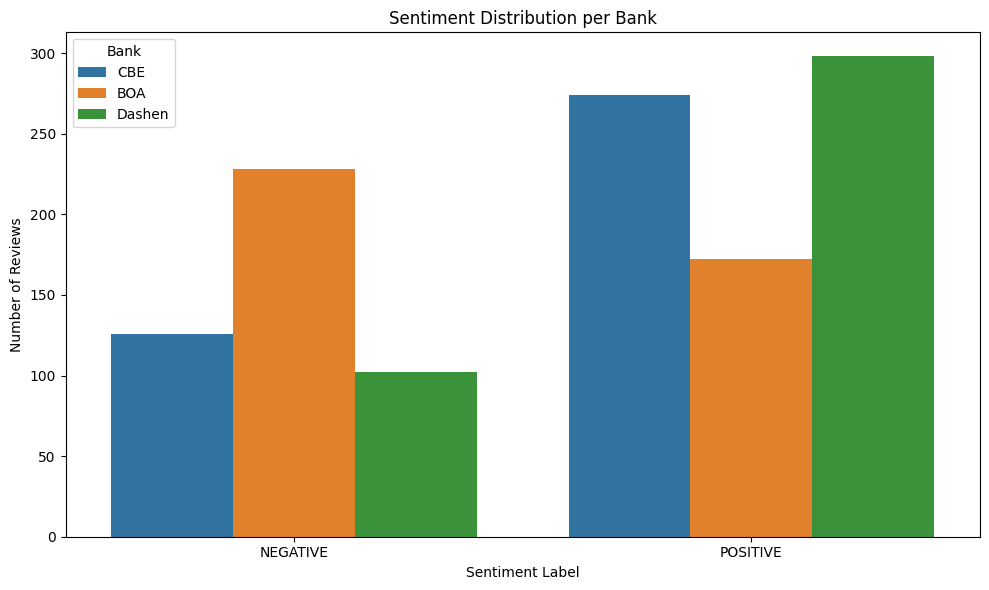

In [12]:
# Plot 2: Sentiment Distribution per Bank

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='sentiment_label', hue='bank', order=['NEGATIVE', 'POSITIVE'])
plt.title('Sentiment Distribution per Bank')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Reviews')
plt.legend(title='Bank')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

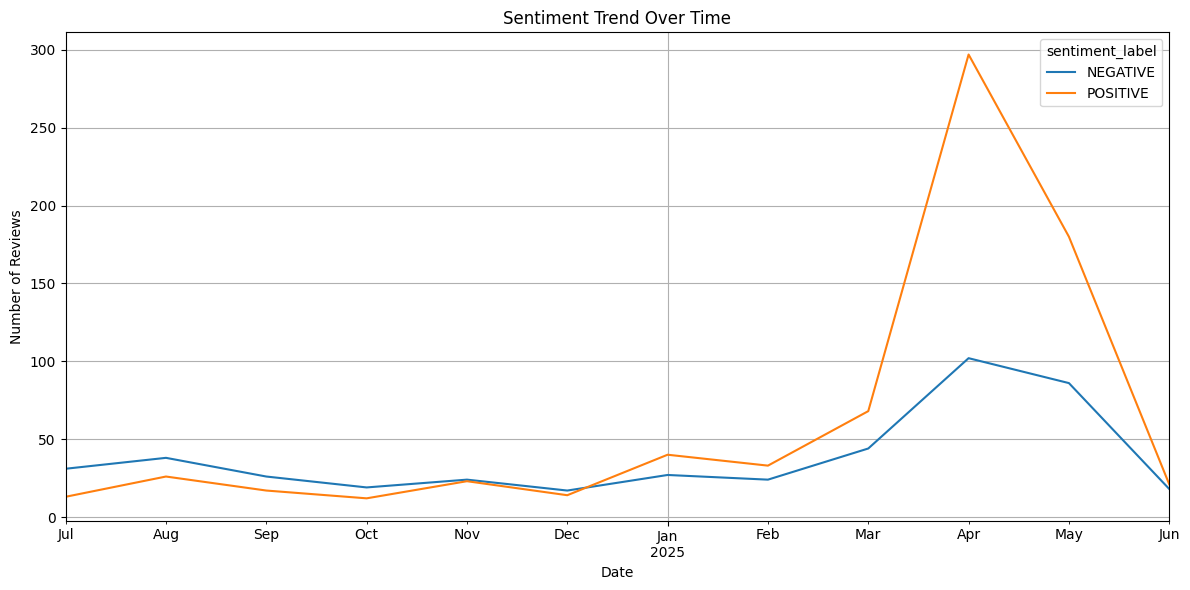

In [ ]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Drop rows where date conversion failed
df = df.dropna(subset=['date'])

# Plot: Sentiment Trend Over Time
plt.figure(figsize=(12,6))
sentiment_over_time = df.groupby([df['date'].dt.to_period('M'), 'sentiment_label']).size().unstack().fillna(0)
sentiment_over_time.index = sentiment_over_time.index.to_timestamp()

sentiment_over_time.plot(kind='line', figsize=(12,6))
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.tight_layout()
plt.show()


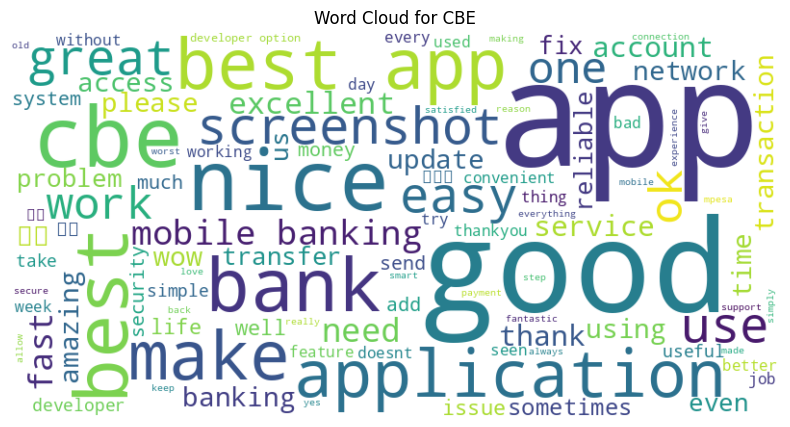

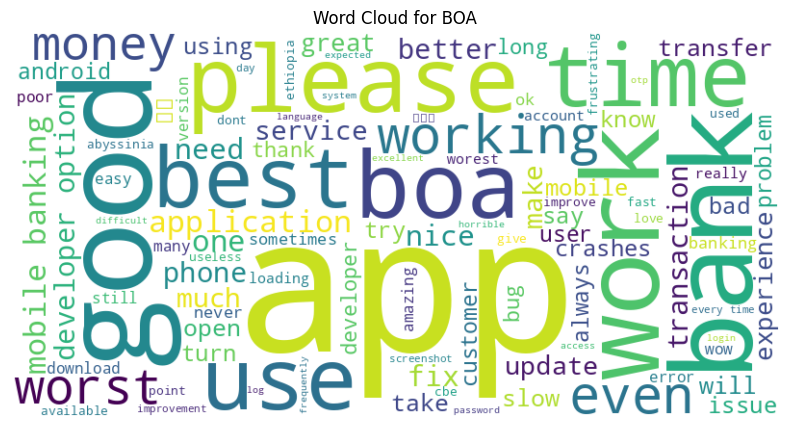

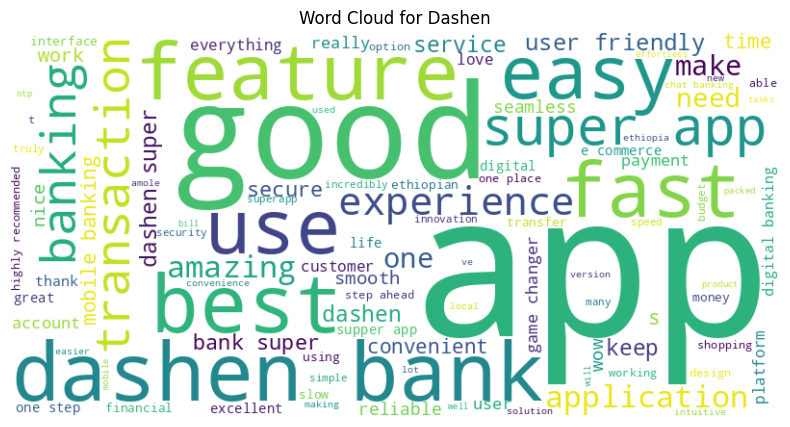

In [15]:
# Plot 4: Word Cloud per Bank

# Optional: clean review text (you can add more cleaning if needed)
df['clean_review'] = df['review'].astype(str).str.lower()

# Generate one wordcloud per bank
banks = df['bank'].unique()

for bank in banks:
    text = " ".join(df[df['bank'] == bank]['clean_review'])
    
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {bank}")
    plt.show()


**Potential Biases**:  
- Reviews may be skewed toward negative experiences (users complain more often than praise).  
- Not all users represent the full customer base (e.g., older users may not post app reviews).  
